# Exploratory analysis of battery datasets

### References

#### BEEP dataset

Datasets:
https://data.matr.io/1/projects/5c48dd2bc625d700019f3204
https://data.matr.io/1/projects/5d80e633f405260001c0b60a

Paper:
https://doi.org/10.1038/s41560-019-0356-8

#### NCA/NCM dataset

Dataset:
https://zenodo.org/records/6405084

Paper:
https://www.nature.com/articles/s41467-022-29837-w#Sec2

### Requirements to run this notebook

`numpy`

`matplotlib`

`pandas`

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [205]:
# prepare dictionaries for cell queries and results

cells = {}
results = {}

In [ ]:
# select discharge cycles for analysis

cycles = [10, 100]

In [ ]:
# load data into dataframe (uncomment at least one of the data files)
# it can take a few minutes to load the data...

# csv files from ccc (/dccstor/beep/dataset)
data_files = ["beep_main_ds.csv", "nca_ncm.csv"]

# prepare dataframe
df = pd.DataFrame(columns=["cell_key", "cycle_number", "current", "voltage", "discharge_capacity"])

for file in data_files:
    print(f"Reading {file}...")
    data = pd.read_csv(file)
    print("Filtering columns...")
    data_keep = data[["cell_key", "cycle_number", "current", "voltage", "discharge_capacity"]]
    print("Concatenating dataframes...")
    df = pd.concat([df, data_keep], ignore_index=True)

In [198]:
data.head(5)

,cell_key,cycle_number,time,charge_policy_Q1,charge_policy_Q2,charge_policy_Q3,charge_policy_Q4,discharge_policy,current,voltage,charge_capacity,discharge_capacity,temperature,discharge_dQdV
0,nca2505008,1.0,0.000,0.5,0.5,0.5,0.5,1.0,0.000029,3.060701,9.628897e-07,0.0,25,0.0
1,nca2505008,1.0,0.030,0.5,0.5,0.5,0.5,1.0,1.749241,3.066016,1.553990e-05,0.0,25,0.0
2,nca2505008,1.0,0.266,0.5,0.5,0.5,0.5,1.0,1.748962,3.071095,1.301941e-04,0.0,25,0.0
3,nca2505008,1.0,0.778,0.5,0.5,0.5,0.5,1.0,1.749047,3.076096,3.789475e-04,0.0,25,0.0
4,nca2505008,1.0,1.510,0.5,0.5,0.5,0.5,1.0,1.749110,3.081096,7.345999e-04,0.0,25,0.0


In [ ]:
# filter the dfframe by certain cell keys

df[df["cell_key"].str.contains("ncm")].groupby(["cell_key"]).max().sort_values(
    by="cycle_number", ascending=True
).head(5)

,cycle_number,current,voltage,discharge_capacity
cell_key,,,,
ncm2505014,43.0,1.751196,4.200469,3.183770
ncm2505002,190.0,1.747492,4.200171,3.242839
ncm2505004,191.0,1.748447,4.200180,3.210343
ncm2505021,191.0,1.749201,4.200187,3.231001
ncm2505003,192.0,1.747880,4.200182,3.216572
ncm2505006,192.0,1.753607,4.200598,3.232083
ncm2505023,192.0,1.748749,4.200155,3.234606
ncm2505020,192.0,1.751265,4.200253,3.218292
ncm2505019,192.0,1.751000,4.200249,3.235815


In [206]:
# select cell name and discharge cycles

# cells['beep_long'] = 'b1c1'
# cells['beep_short'] = 'b2c0'
# cells['nca_long'] = 'nca4505012'
# cells['nca_short'] = 'nca2505001'
cells["ncm_long"] = "ncm4505027"
cells["ncm_short"] = "ncm2505002"

for cell in cells:
    for cycle in cycles:
        cell_name = cells[cell]
        if results.get(cell) is None:
            results[cell] = {}
        results[cell][f"cycle_{cycle}"] = df.query(
            "cycle_number==@cycle & current < 0 & cell_key==@cell_name"
        )

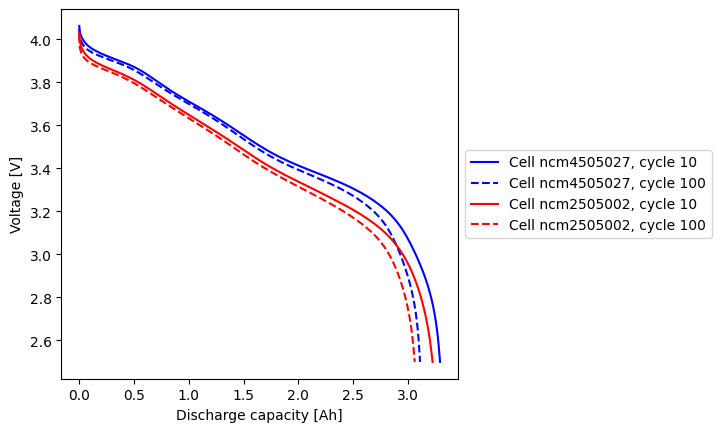

In [207]:
# plot discharge cycles

fig1, ax1 = plt.subplots()

legend_entries = []
styles = ["b-", "b--", "r-", "r--", "g-", "g--", "y-", "y--"]

i = 0

for cell in results:
    for cycle in cycles:
        results[cell][f"cycle_{cycle}"].plot(
            ax=ax1, kind="line", x="discharge_capacity", y="voltage", style=styles[i]
        )
        legend_entries.append(f"Cell {cells[cell]}, cycle {cycle}")
        i = i + 1

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

legend = ax1.legend(legend_entries, loc="center left", bbox_to_anchor=(1, 0.5))
_ = ax1.set_xlabel("Discharge capacity [Ah]")
_ = ax1.set_ylabel("Voltage [V]")

In [213]:
results["ncm_long"].keys()

dict_keys(['cycle_10', 'cycle_100', 'cycle_10_interp', 'cycle_100_interp', 'cycle_100-10_delta_q'])

In [216]:
# interpolate voltage scale in order to calculate difference in discharge capacity between two cycles

# define common voltage scale to interpolate discharge capacity and enable calculation of difference in capacity between two cycles
common_voltages = {
    "beep": np.linspace(2.0, 3.6, 500),
    "nca": np.linspace(2.65, 4.05, 500),
    "ncm": np.linspace(2.5, 4.2, 500),
}

for cell in results:
    for cycle in list(results[cell].keys()):
        if "interp" not in cycle and "delta_q" not in cycle:
            original_voltage = results[cell][cycle][
                (results[cell][cycle]["voltage"].diff() < 0)
                | (results[cell][cycle]["discharge_capacity"].diff() >= 0)
            ]["voltage"].to_numpy()
            original_capacity = results[cell][cycle][
                (results[cell][cycle]["voltage"].diff() < 0)
                | (results[cell][cycle]["discharge_capacity"].diff() >= 0)
            ]["discharge_capacity"].to_numpy()
            original_voltage_capacity = np.stack((original_voltage, original_capacity), axis=1)
            original_voltage_capacity_sorted = original_voltage_capacity[
                original_voltage_capacity[:, 0].argsort()
            ]  # note this may change order of a few rows, but generally should not have a big impact on the interpolation
            if "beep" in cell:
                common_voltage = common_voltages["beep"]
                new_capacity = np.interp(
                    common_voltage,
                    original_voltage_capacity_sorted[:, 0],
                    original_voltage_capacity_sorted[:, 1],
                )
            elif "nca" in cell:
                common_voltage = common_voltages["nca"]
                new_capacity = np.interp(
                    common_voltage,
                    original_voltage_capacity_sorted[:, 0],
                    original_voltage_capacity_sorted[:, 1],
                )
            elif "ncm" in cell:
                common_voltage = common_voltages["ncm"]
                new_capacity = np.interp(
                    common_voltage,
                    original_voltage_capacity_sorted[:, 0],
                    original_voltage_capacity_sorted[:, 1],
                )
            key_name_for_dict = f"{cycle}_interp"
            results[cell][key_name_for_dict] = pd.DataFrame(
                data={"voltage": common_voltage, "discharge_capacity": new_capacity}
            )

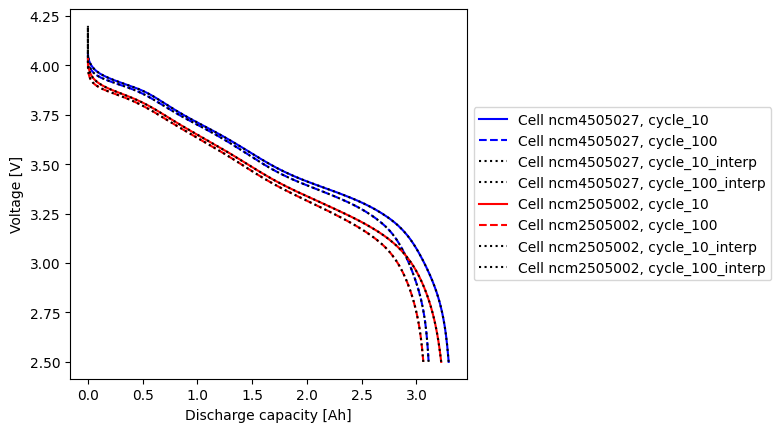

In [219]:
# compare interpolated discharge curve against original

fig2, ax2 = plt.subplots()

legend_entries = []
styles = [
    "b-",
    "b--",
    "k:",
    "k:",
    "r-",
    "r--",
    "k:",
    "k:",
    "g-",
    "g--",
    "k:",
    "k:",
    "y-",
    "y--",
    "k:",
    "k:",
]

i = 0

for cell in results:
    for cycle in results[cell]:
        if "delta_q" not in cycle:
            results[cell][cycle].plot(
                ax=ax2, kind="line", x="discharge_capacity", y="voltage", style=styles[i]
            )
            legend_entries.append(f"Cell {cells[cell]}, {cycle}")
            i = i + 1

box = ax2.get_position()
ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])

legend = ax2.legend(legend_entries, loc="center left", bbox_to_anchor=(1, 0.5))
_ = ax2.set_xlabel("Discharge capacity [Ah]")
_ = ax2.set_ylabel("Voltage [V]")

In [220]:
# calculate Q100-Q10: difference in discharge capacity between 100th cycle and 10th cycle

for cell in results:
    common_voltage = results[cell][f"cycle_{cycles[1]}_interp"]["voltage"]
    q100_q10 = (
        results[cell][f"cycle_{cycles[1]}_interp"]["discharge_capacity"]
        - results[cell][f"cycle_{cycles[0]}_interp"]["discharge_capacity"]
    )
    results[cell][f"cycle_{cycles[1]}-{cycles[0]}_delta_q"] = pd.DataFrame(
        data={"voltage": common_voltage, "q100_q10": q100_q10}
    )

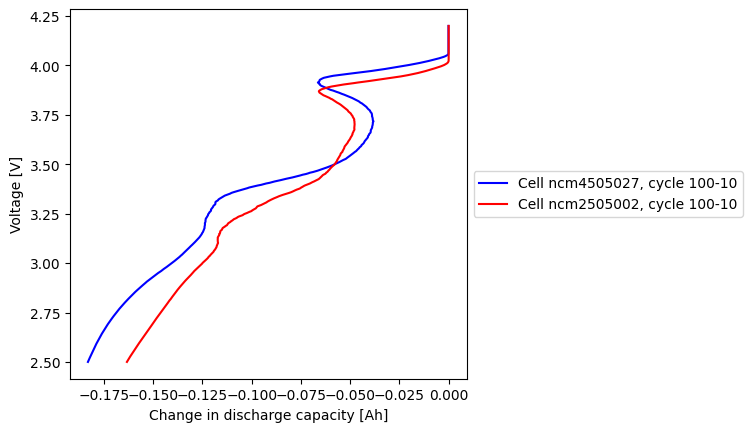

In [221]:
# plot voltage against difference in discharge capacity between the two cycles

fig3, ax3 = plt.subplots()

legend_entries = []
styles = ["b-", "r-", "g-", "y-"]

i = 0

for cell in results:
    for cycle in results[cell]:
        if f"{cycles[1]}-{cycles[0]}" in cycle:
            results[cell][cycle].plot(
                ax=ax3, kind="line", x="q100_q10", y="voltage", style=styles[i]
            )
            legend_entries.append(f"Cell {cells[cell]}, cycle {cycles[1]}-{cycles[0]}")
            i = i + 1

box = ax3.get_position()
ax3.set_position([box.x0, box.y0, box.width * 0.8, box.height])

legend = ax3.legend(legend_entries, loc="center left", bbox_to_anchor=(1, 0.5))
_ = ax3.set_xlabel("Change in discharge capacity [Ah]")
_ = ax3.set_ylabel("Voltage [V]")